# DSCI 100 Project Proposal: Optimizing Training in Professional Tennis
**Name | Student #**

Luke Pielak | 21805650

## Introduction
- Professional tennis tournaments are played on four different surfaces: **concrete** (also known as “hard”), **clay**, **grass**, and—occasionally—, **carpet**.
- Surfaces significantly influence the speed of play in tennis due to the way the ball interacts with different materials. For example, grass tennis courts are typically considered fast while clay courts are known to be slow in comparison.
- Players often develop specialties based on their skills and playing style that are dependent on the playing surface. 
- We hope to identify which surface will yield the most success for a player based on attributes and elements of their - performance: **Backhand style**, **Height**, **Age**, and **previously-favoured Surface**.
- The player’s dataset at *ultimatetennisstatistics.com* contains all necessary data to create a model.


## Preliminary exploratory data analysis


In [7]:
# importing libraries
library(tidyverse)
library(repr)
library(tidymodels)
library(RColorBrewer)

In [78]:
# Reading the dataset into R

# We will take a few steps to tidy the data:
# 1. Select only the variables that contain meaningful data for our analysis
# 2. Remove dates from Age column and convert to numeric type
# 3. Remove percentages from Favorite.Surface so that is purely categorical 

# Selecting variables
tennis <- read.csv("data/tennis.csv") |>
    select(Backhand, Height, Age, Favorite.Surface)

# Remove rows with missing data
tennis <- tennis[complete.cases(tennis),]

# Remove the date from the "Age" column
tennis$Age <- sub("\\s*\\(.*\\)", "", tennis$Age)

# Convert the "Age" column to numeric data type
tennis$Age <- as.numeric(tennis$Age)

# Remove the percentage from the "Favorite.Surface" column
tennis$Favorite.Surface <- sub("\\s*\\d+%", "", tennis$Favorite.Surface)


# wrangle data to report the number of observations for each class, and how many observations contain missing data (row 1)
tennis_summary <- tennis |>
  group_by(Favorite.Surface) |>
  summarize(Observations = n())

tennis_summary

Favorite.Surface,Observations
<chr>,<int>
All-Rounder,12
Carpet,2
Clay,66
"Fast (H, G)",17
Grass,35
Hard,58
Non-Grass,1
None,26
"Slow (H, Cl)",18


- Here we can see how many observations are complete for each class under Favorite.Surface. 
- The first row counts incomplete observations, this means that there are 259 rows that contain empty cells.
- In the plot below we will compare the distribution of each class in a bar graph.

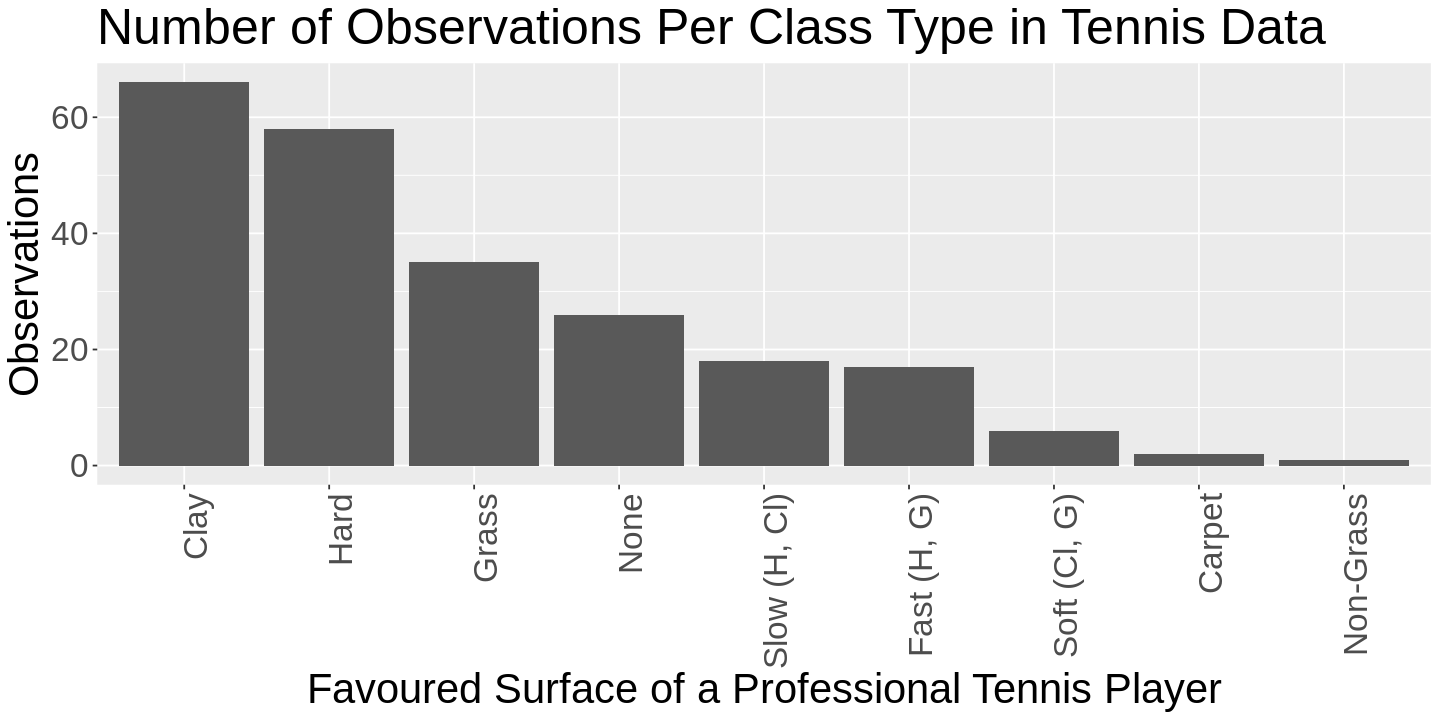

In [79]:
# vizualizing the distribution of classes

options(repr.plot.width = 12, repr.plot.height = 6)

#remove category for observations with missing data
tennis_summary <- tennis_summary |> slice(2:11)


tennisplot <- tennis_summary |> 
              ggplot(aes(x = reorder(Favorite.Surface, -Observations), y = Observations)) +
              geom_bar(stat = "identity", position = "dodge") +
              labs(x = "Favoured Surface of a Professional Tennis Player", y = "Observations", title = "Number of Observations Per Class Type in Tennis Data") +
              scale_fill_brewer(palette = 'Set3') +
              theme(text = element_text(size = 25)) +
              theme(axis.text.x = element_text(angle = 90, hjust = 1)) 
                    
tennisplot
              
              

- Here we can clearly see that Clay, Hard, and Grass are the most popular classes while the more specialized classes are more niche.
- We can use this information to help us decide which classes are most important to include in our model.

## Methods

## Expected Outcomes and Significance